In [1]:
import matplotlib.pyplot as plt
from pycqed import *
from pycqed.util import *

## Mutual Inductance Example

Here we show how to couple circuits via mutual inductances.

We will use the RF-SQUID since it is easily simulated:

Using existing PyCQED tmp output root directory '/tmp/.pycqed/'.


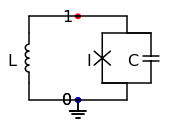

In [2]:
circuit = CircuitSpec("RF-SQUID Qubit Circuit")
circuit.addBranch(["L"],"up",0,False,arm_len=0.5)
circuit.addBranch(["I","C"],"down",1,True,arm_len=0.5)
circuit.drawCircuit(inline=True)

# Create Hamiltonian generator
hamil = HamilSpec(circuit,mode="node")
hamil.setTruncation(1,10,"charge")
hamil.prepareOperators()

# Fabrication parameters
Ca = 60.0 # fF/um^2
Jc = 3.0  # uA/um^2
Aj = 0.2*1.2#0.4**2 # um^2

# Set the parameter values
hamil.setParameterValues(
    'C',Ca*Aj,
    'I',Jc*Aj,
    'L',570.0,
    'phi10e',0.5
)

In [3]:
spec = [
    hamil.sweepSpec('phi10e',0.49,0.51,101)
]
sweep = hamil.paramSweep(spec,timesweep=True)

Parameter Sweep Duration:
  Initialization:	0.047 s
  Loop duration:	0.655 s
  Avg iteration:	0.006 s


In [4]:
x,E,v = hamil.getSweep(sweep,'phi10e',{},evaluable='getHamiltonian')

Text(0, 0.5, '$E_{g,i}$ (GHz)')

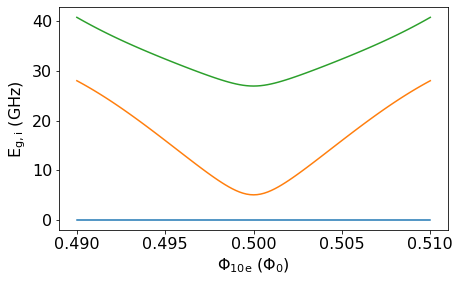

In [5]:
for i in range(3):
    plt.plot(x,E[i]-E[0])
plt.xlabel("$\\Phi_{10e}$ ($\\Phi_0$)")
plt.ylabel("$E_{g,i}$ (GHz)")

Now lets define two RF-SQUIDs side-by-side

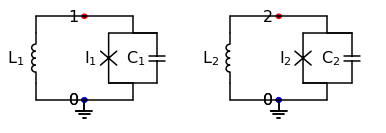

In [6]:
circuit = CircuitSpec("RF-SQUID Qubit Circuit")
circuit.addBranch(["L1"],"up",0,False,arm_len=0.5)
circuit.addBranch(["I1","C1"],"down",1,True,arm_len=0.5)
circuit.addGroundNode((6.0,0))

circuit.addBranch(["L2"],"up",0,False,arm_len=0.5)
circuit.addBranch(["I2","C2"],"down",2,True,arm_len=0.5)

circuit.drawCircuit(inline=True)

In [7]:
circuit.getInductanceMatrix()

Matrix([
[1.0*L_{1},         0],
[        0, 1.0*L_{2}]])

In [8]:
# Create Hamiltonian generator
hamil = HamilSpec(circuit,mode="node")
hamil.setTruncation(1,10,"charge")
hamil.setTruncation(2,10,"charge")
hamil.prepareOperators()

# Fabrication parameters
Ca = 60.0 # fF/um^2
Jc = 3.0  # uA/um^2
Aj = 0.2*1.2#0.4**2 # um^2

# Set the parameter values
hamil.setParameterValues(
    'C1',Ca*Aj,
    'I1',Jc*Aj,
    'L1',570.0,
    'C2',Ca*Aj,
    'I2',Jc*Aj,
    'L2',570.0,
    'phi10e',0.5,
    'phi20e',0.5
)

Using existing PyCQED tmp output root directory '/tmp/.pycqed/'.


In [9]:
spec = [
    hamil.sweepSpec('phi10e',0.49,0.51,101)
]
sweep = hamil.paramSweep(spec,timesweep=True)

Parameter Sweep Duration:
  Initialization:	0.373 s
  Loop duration:	14.290 s
  Avg iteration:	0.141 s


In [10]:
x,E,v = hamil.getSweep(sweep,'phi10e',{})

Text(0, 0.5, '$E_{g,i}$ (GHz)')

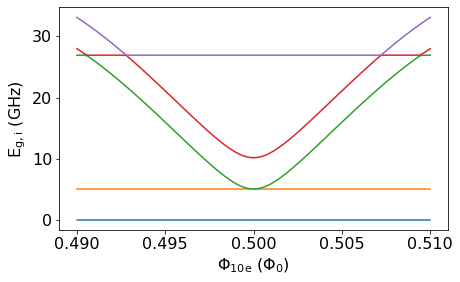

In [11]:
for i in range(5):
    plt.plot(x,E[i]-E[0])
plt.xlabel("$\\Phi_{10e}$ ($\\Phi_0$)")
plt.ylabel("$E_{g,i}$ (GHz)")

We see that, since the two RF-SQUIDs do not interact in any way, the circuit that is not biased has a flat energy band as a function of the flux of the biased circuit.

Now adding the mutual inductive coupling, implicitely in that it is not drawn in the circuit:

In [12]:
circuit.coupleBranchesImplicitly("M12", (0,1), (0,2))

In [13]:
circuit.getInductanceMatrix()

Matrix([
[ 1.0*L_{1}, 1.0*M_{12}],
[1.0*M_{12},  1.0*L_{2}]])

In [14]:
# Create Hamiltonian generator
hamil = HamilSpec(circuit,mode="node")
hamil.setTruncation(1,10,"charge")
hamil.setTruncation(2,10,"charge")
hamil.prepareOperators()

# Fabrication parameters
Ca = 60.0 # fF/um^2
Jc = 3.0  # uA/um^2
Aj = 0.2*1.2#0.4**2 # um^2

# Set the parameter values
hamil.setParameterValues(
    'C1',Ca*Aj,
    'I1',Jc*Aj,
    'L1',570.0,
    'C2',Ca*Aj,
    'I2',Jc*Aj,
    'L2',570.0,
    'M12',2.0,
    'phi10e',0.5,
    'phi20e',0.5
)

Using existing PyCQED tmp output root directory '/tmp/.pycqed/'.


We see the inductive terms of the previously non-interacting circuits are now loaded by the mutual inductance term.

In [15]:
circuit.getInverseInductanceMatrix()

Matrix([
[  1.0*L_{2}/(1.0*L_{1}*L_{2} - 1.0*M_{12}**2), -1.0*M_{12}/(1.0*L_{1}*L_{2} - 1.0*M_{12}**2)],
[-1.0*M_{12}/(1.0*L_{1}*L_{2} - 1.0*M_{12}**2),   1.0*L_{1}/(1.0*L_{1}*L_{2} - 1.0*M_{12}**2)]])

In [16]:
circuit.getInductanceMatrix(mode='branch')

Matrix([
[ L_{1}, M_{12}, 0, 0],
[M_{12},  L_{2}, 0, 0],
[     0,      0, 0, 0],
[     0,      0, 0, 0]])

In [17]:
spec = [
    hamil.sweepSpec('phi10e',0.49,0.51,101)
]
sweep = hamil.paramSweep(spec,timesweep=True)

Parameter Sweep Duration:
  Initialization:	3.716 s
  Loop duration:	26.501 s
  Avg iteration:	0.262 s


In [18]:
x,E,v = hamil.getSweep(sweep,'phi10e',{},evaluable='getHamiltonian')

Text(0, 0.5, '$E_{g,i}$ (GHz)')

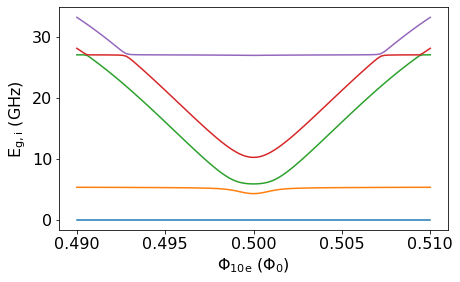

In [19]:
for i in range(5):
    plt.plot(x,E[i]-E[0])
plt.xlabel("$\\Phi_{10e}$ ($\\Phi_0$)")
plt.ylabel("$E_{g,i}$ (GHz)")

We now see that the energy levels associated with the unbiased circuit are no longer flat, due to the finite magnetic interaction induced by the mutual inductance. We now see the formation of avoided crossings where previously the energy levels associated with each circuit would cross.

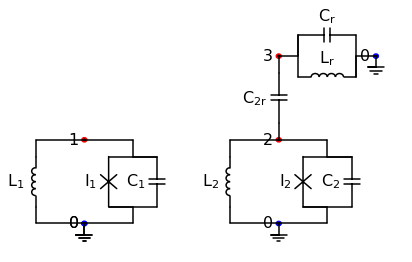

In [55]:
circuit = CircuitSpec("RF-SQUID Qubit Circuit")
circuit.addBranch(["L1"],"up",0,False,arm_len=0.5)
circuit.addBranch(["I1","C1"],"down",1,True,arm_len=0.5)
circuit.addGroundNode((6.0,0))

circuit.addBranch(["L2"],"up",0,False,arm_len=0.5)
circuit.addBranch(["I2","C2"],"down",2,True,arm_len=0.5)

circuit.coupleBranchesImplicitly("M12", (0,1), (0,2))

rcircuit = circuit.coupleLinearResonator("r",2)
rcircuit.drawCircuit(inline=True)

In [56]:
rcircuit.getQuantumHamiltonian()

Matrix([[-0.5*I_{1}*(e^{i\phi_{10e}}*D_{1} + conjugate(e^{i\phi_{10e}})*D^{\dagger}_{1}) - 0.5*I_{2}*(e^{i\phi_{20e}}*D_{2} + conjugate(e^{i\phi_{20e}})*D^{\dagger}_{2}) + (0.5*C_{2r}*Q_{2}/(-C_{2r}**2 + (C_{2r} + C_{2})*(C_{2r} + C_{r})) + 0.5*(C_{2r} + C_{2})*Q_{3}/(-C_{2r}**2 + (C_{2r} + C_{2})*(C_{2r} + C_{r})))*Q_{3} + (0.5*C_{2r}*Q_{3}/(-C_{2r}**2 + (C_{2r} + C_{2})*(C_{2r} + C_{r})) + 0.5*(C_{2r} + C_{r})*Q_{2}/(-C_{2r}**2 + (C_{2r} + C_{2})*(C_{2r} + C_{r})))*Q_{2} + (0.5*L_{1}*\Phi_{2}/(1.0*L_{1}*L_{2} - 1.0*M_{12}**2) - 0.5*M_{12}*\Phi_{1}/(1.0*L_{1}*L_{2} - 1.0*M_{12}**2))*\Phi_{2} + (0.5*L_{2}*\Phi_{1}/(1.0*L_{1}*L_{2} - 1.0*M_{12}**2) - 0.5*M_{12}*\Phi_{2}/(1.0*L_{1}*L_{2} - 1.0*M_{12}**2))*\Phi_{1} + 0.5*\Phi_{3}**2/L_{r} + 0.5*Q_{1}**2/C_{1}]])

In [57]:
# Create Hamiltonian generator
hamil = HamilSpec(circuit,include_subsystem="r")
hamil.setTruncation(1,10,"charge")
hamil.setTruncation(2,10,"charge")
hamil.prepareOperators()

hamil.setDiagConfig(get_vectors=True,eigvalues=20)

# Fabrication parameters
Ca = 60.0 # fF/um^2
Jc = 3.0  # uA/um^2
Aj = 0.2*1.2#0.4**2 # um^2

# Set the parameter values
hamil.setParameterValues(
    'C1',Ca*Aj,
    'I1',Jc*Aj,
    'L1',550.0,
    'C2',Ca*Aj,
    'I2',Jc*Aj,
    'L2',550.0,
    'M12',10.0,
    'phi10e',0.5,
    'phi20e',0.5,
    'Cr',400.0,
    'Lr',1000.0,
    'C2r',5.0
)

Using existing PyCQED tmp output root directory '/tmp/.pycqed/'.


In [58]:
# Configure the items to be evaluated
evals = [
    hamil.evalSpec('getHamiltonian',True,None),
    hamil.evalSpec('getResonatorResponse',False,"getHamiltonian",eval_dp=True),
]
spec = [
    hamil.sweepSpec('phi20e',0.0,1.0,101)
]
sweep = hamil.paramSweep(spec,eval_spec=evals,timesweep=True)

Parameter Sweep Duration:
  Initialization:	3.214 s
  Loop duration:	26.965 s
  Avg iteration:	0.267 s


In [59]:
x,E,v = hamil.getSweep(sweep,'phi20e',{},evaluable='getHamiltonian')

Text(0, 0.5, '$E_{g,i}$ (GHz)')

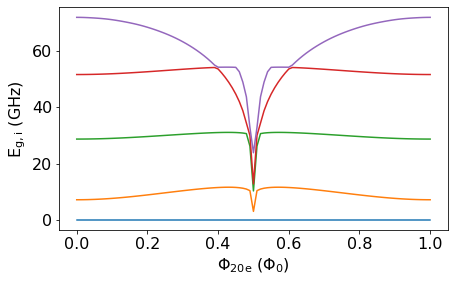

In [60]:
for i in range(5):
    plt.plot(x,E[i,0]-E[0,0])
plt.xlabel("$\\Phi_{20e}$ ($\\Phi_0$)")
plt.ylabel("$E_{g,i}$ (GHz)")

In [61]:
x,Erwa,v = hamil.getSweep(sweep,'phi20e',{},evaluable='getResonatorResponse')

In [62]:
Eres = util.getResonatorShift(Erwa)

Text(0, 0.5, '$\\omega_{r}$ (GHz)')

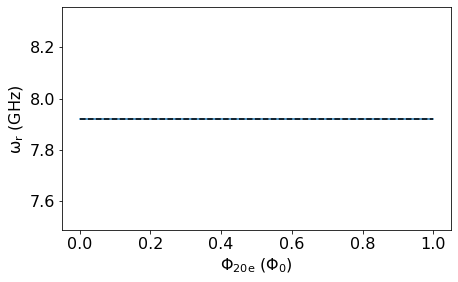

In [63]:
wr = hamil.dpnp['w']
plt.plot(x,Eres[0,0])
plt.plot([x[0],x[-1]],[wr,wr],"k--")
plt.xlabel("$\\Phi_{20e}$ ($\\Phi_0$)")
plt.ylabel("$\omega_{r}$ (GHz)")

In [64]:
hamil.setParameterValue('phi10e',0.495)

In [65]:
sweep = hamil.paramSweep(spec,eval_spec=evals,timesweep=True)

Parameter Sweep Duration:
  Initialization:	3.226 s
  Loop duration:	27.144 s
  Avg iteration:	0.269 s


In [66]:
x,Erwa,v = hamil.getSweep(sweep,'phi20e',{},evaluable='getResonatorResponse')

Text(0, 0.5, '$\\omega_{r}$ (GHz)')

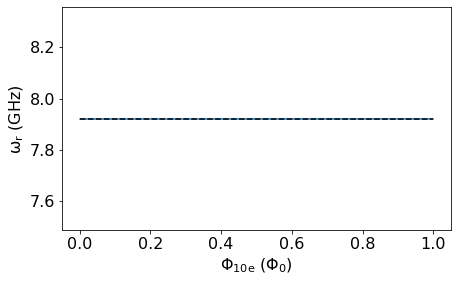

In [67]:
wr = hamil.dpnp['w']
plt.plot(x,Eres[0,0])
plt.plot([x[0],x[-1]],[wr,wr],"k--")
plt.xlabel("$\\Phi_{10e}$ ($\\Phi_0$)")
plt.ylabel("$\omega_{r}$ (GHz)")

# Full Circuit

In [70]:
hamil = HamilSpec(rcircuit)
hamil.setTruncation(1,7,"charge")
hamil.setTruncation(2,7,"charge")
hamil.setTruncation(3,7,"charge")
hamil.prepareOperators()

Using existing PyCQED tmp output root directory '/tmp/.pycqed/'.


In [71]:
hamil.getHilbertSpaceSize()

3375

In [72]:
# Fabrication parameters
Ca = 60.0 # fF/um^2
Jc = 3.0  # uA/um^2
Aj = 0.2*1.2#0.4**2 # um^2

# Set the parameter values
hamil.setParameterValues(
    'C1',Ca*Aj,
    'I1',Jc*Aj,
    'L1',550.0,
    'C2',Ca*Aj,
    'I2',Jc*Aj,
    'L2',550.0,
    'M12',10.0,
    'phi10e',0.5,
    'phi20e',0.5,
    'Cr',400.0,
    'Lr',1000.0,
    'C2r',5.0
)

In [73]:
spec = [
    hamil.sweepSpec('phi20e',0.4,0.6,101)
]
sweep = hamil.paramSweep(spec)

Text(0, 0.5, '$E_{g,i}$ (GHz)')

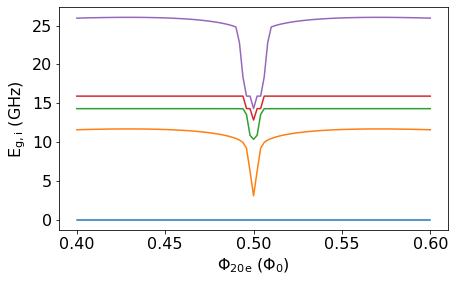

In [74]:
x,Efull,v = hamil.getSweep(sweep,'phi20e',{})
for i in range(5):
    plt.plot(x,Efull[i]-Efull[0])
plt.xlabel("$\\Phi_{20e}$ ($\\Phi_0$)")
plt.ylabel("$E_{g,i}$ (GHz)")